In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [2]:
s=str.maketrans('','',punctuation)
a='salam!@'
a.translate(s)

'salam'

In [3]:
stop_word=stopwords.words('english')


In [ ]:
negaitve_d=[]
max_len_negaitve=0
for file in os.listdir('data/neg'):
    with open('data/neg/'+file) as f:
        txt=f.read()
    token= word_tokenize(txt)
    t=str.maketrans('','',punctuation)
    token=[w.translate(t) for w in token]
    token=[w for w in token if not  w in stop_word]
    if len(token)> max_len_negaitve:
        max_len_negaitve=len(token)
    doc=' '.join(token)
    negaitve_d.append(' '.join(token))
len(negaitve_d)

In [130]:
posetive_d=[]
max_len_positive=0
for file in os.listdir('data/pos'):
    with open('data/pos/'+file) as f:
        txt=f.read()
    token= word_tokenize(txt)
    t=str.maketrans('','',punctuation)
    token=[w.translate(t) for w in token]
    token=[w for w in token if not  w in stop_word]
    if len(token)> max_len_positive:
        max_len_positive=len(token)
    doc=' '.join(token)
    posetive_d.append(' '.join(token))
len(posetive_d)

1000

In [131]:
max_len = max(max_len_negaitve, max_len_positive)

In [132]:
random.shuffle(negaitve_d)
random.shuffle(posetive_d)

x_train=negaitve_d[:800]+posetive_d[:800]

In [133]:
y_train=[0 for _ in range(800)] +[1 for _ in range(800)]

In [134]:
x_test=negaitve_d[800:]+posetive_d[800:]

In [135]:
y_test=[0 for _ in range(200)] +[1 for _ in range(200)]


In [136]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Embedding,Conv1D,MaxPool1D,Dropout
from tensorflow.keras.layers import concatenate

In [137]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)

In [138]:
vocab_len=len(tokenizer.word_index)+1
vocab_len

40492

In [139]:
encoded=tokenizer.texts_to_sequences(x_train)
encoded[5]

[205,
 14,
 4,
 403,
 394,
 3399,
 3623,
 14976,
 338,
 9,
 18184,
 785,
 108,
 719,
 18185,
 12850,
 831,
 12851,
 256,
 1,
 97,
 574,
 343,
 842,
 1166,
 2204,
 8496,
 42,
 6874,
 3115,
 7843,
 11388,
 488,
 510,
 1,
 234,
 131,
 77,
 98,
 23826,
 4037,
 250,
 1651,
 27,
 811,
 2205,
 811,
 171,
 2932,
 76,
 569,
 3116,
 4038,
 489,
 23827,
 986,
 551,
 2779,
 4039,
 785,
 665,
 1803,
 1241,
 7844,
 23828,
 1614,
 6168,
 11389,
 1241,
 23829,
 18186,
 6875,
 23830,
 6876,
 1212,
 535,
 1742,
 2077,
 23831,
 429,
 5236,
 2848,
 948,
 11390,
 12852,
 288,
 23832,
 5831,
 23833,
 18187,
 20,
 429,
 4387,
 4577,
 4999,
 1330,
 251,
 242,
 18188,
 1058,
 12853,
 12854,
 2115,
 5000,
 3624,
 2244,
 5531,
 802,
 1545,
 85,
 32,
 2780,
 524,
 12855,
 1742,
 252,
 5532,
 1709,
 1212,
 416,
 1029,
 6877,
 985,
 2032,
 12856,
 499,
 495,
 111,
 2704,
 1,
 2933,
 4388,
 111,
 12857,
 1030,
 599,
 23834,
 3013,
 717,
 9284,
 1031,
 1423,
 495,
 7845,
 868,
 752,
 10183,
 1330,
 347,
 811,
 8,
 40

In [140]:
paded=pad_sequences(encoded,maxlen=max_len,padding='post')
paded

array([[  401,     1,  1513, ...,     0,     0,     0],
       [   31,  1286,   172, ...,     0,     0,     0],
       [ 7290,    38,    42, ...,     0,     0,     0],
       ...,
       [  796,   220,    24, ...,     0,     0,     0],
       [  155, 40471,  1348, ...,     0,     0,     0],
       [ 9204,  6868, 17699, ...,     0,     0,     0]],
      shape=(1600, 1693), dtype=int32)

In [141]:
encoded_test=tokenizer.texts_to_sequences(x_test)
paded_test=pad_sequences(encoded_test,maxlen=max_len,padding='post')

In [142]:
input_1=Input(shape=(max_len,),)
embedding1=Embedding(vocab_len,100)(input_1)
conv1=Conv1D(filters=32,kernel_size=4,activation='relu')(embedding1)
drop_1=Dropout(0.5)(conv1)
max_pol1=MaxPool1D(pool_size=2)(drop_1)
flat1=Flatten()(max_pol1)



input_2=Input(shape=(max_len,),)
embedding2=Embedding(vocab_len,100)(input_2)
conv2=Conv1D(filters=32,kernel_size=6,activation='relu')(embedding2)
drop_2=Dropout(0.5)(conv2)
max_pol2=MaxPool1D(pool_size=2)(drop_2)
flat2=Flatten()(max_pol2)





input_3=Input(shape=(max_len,),)
embedding3=Embedding(vocab_len,100)(input_3)
conv3=Conv1D(filters=32,kernel_size=8,activation='relu')(embedding3)
drop_3=Dropout(0.5)(conv3)
max_pol3=MaxPool1D(pool_size=2)(drop_3)
flat3=Flatten()(max_pol3)





input_4=Input(shape=(max_len,),)
embedding4=Embedding(vocab_len,100)(input_4)
conv4=Conv1D(filters=32,kernel_size=10,activation='relu')(embedding4)
drop_4=Dropout(0.5)(conv4)
max_pol4=MaxPool1D(pool_size=2)(drop_4)
flat4=Flatten()(max_pol4)

conc=concatenate([flat1,flat2,flat3,flat4])


dense1=Dense(10,activation='relu')(conc)
output=Dense(1,activation='sigmoid')(dense1)

In [143]:
model = Model(inputs=[input_1,input_2,input_3,input_4], outputs=output)

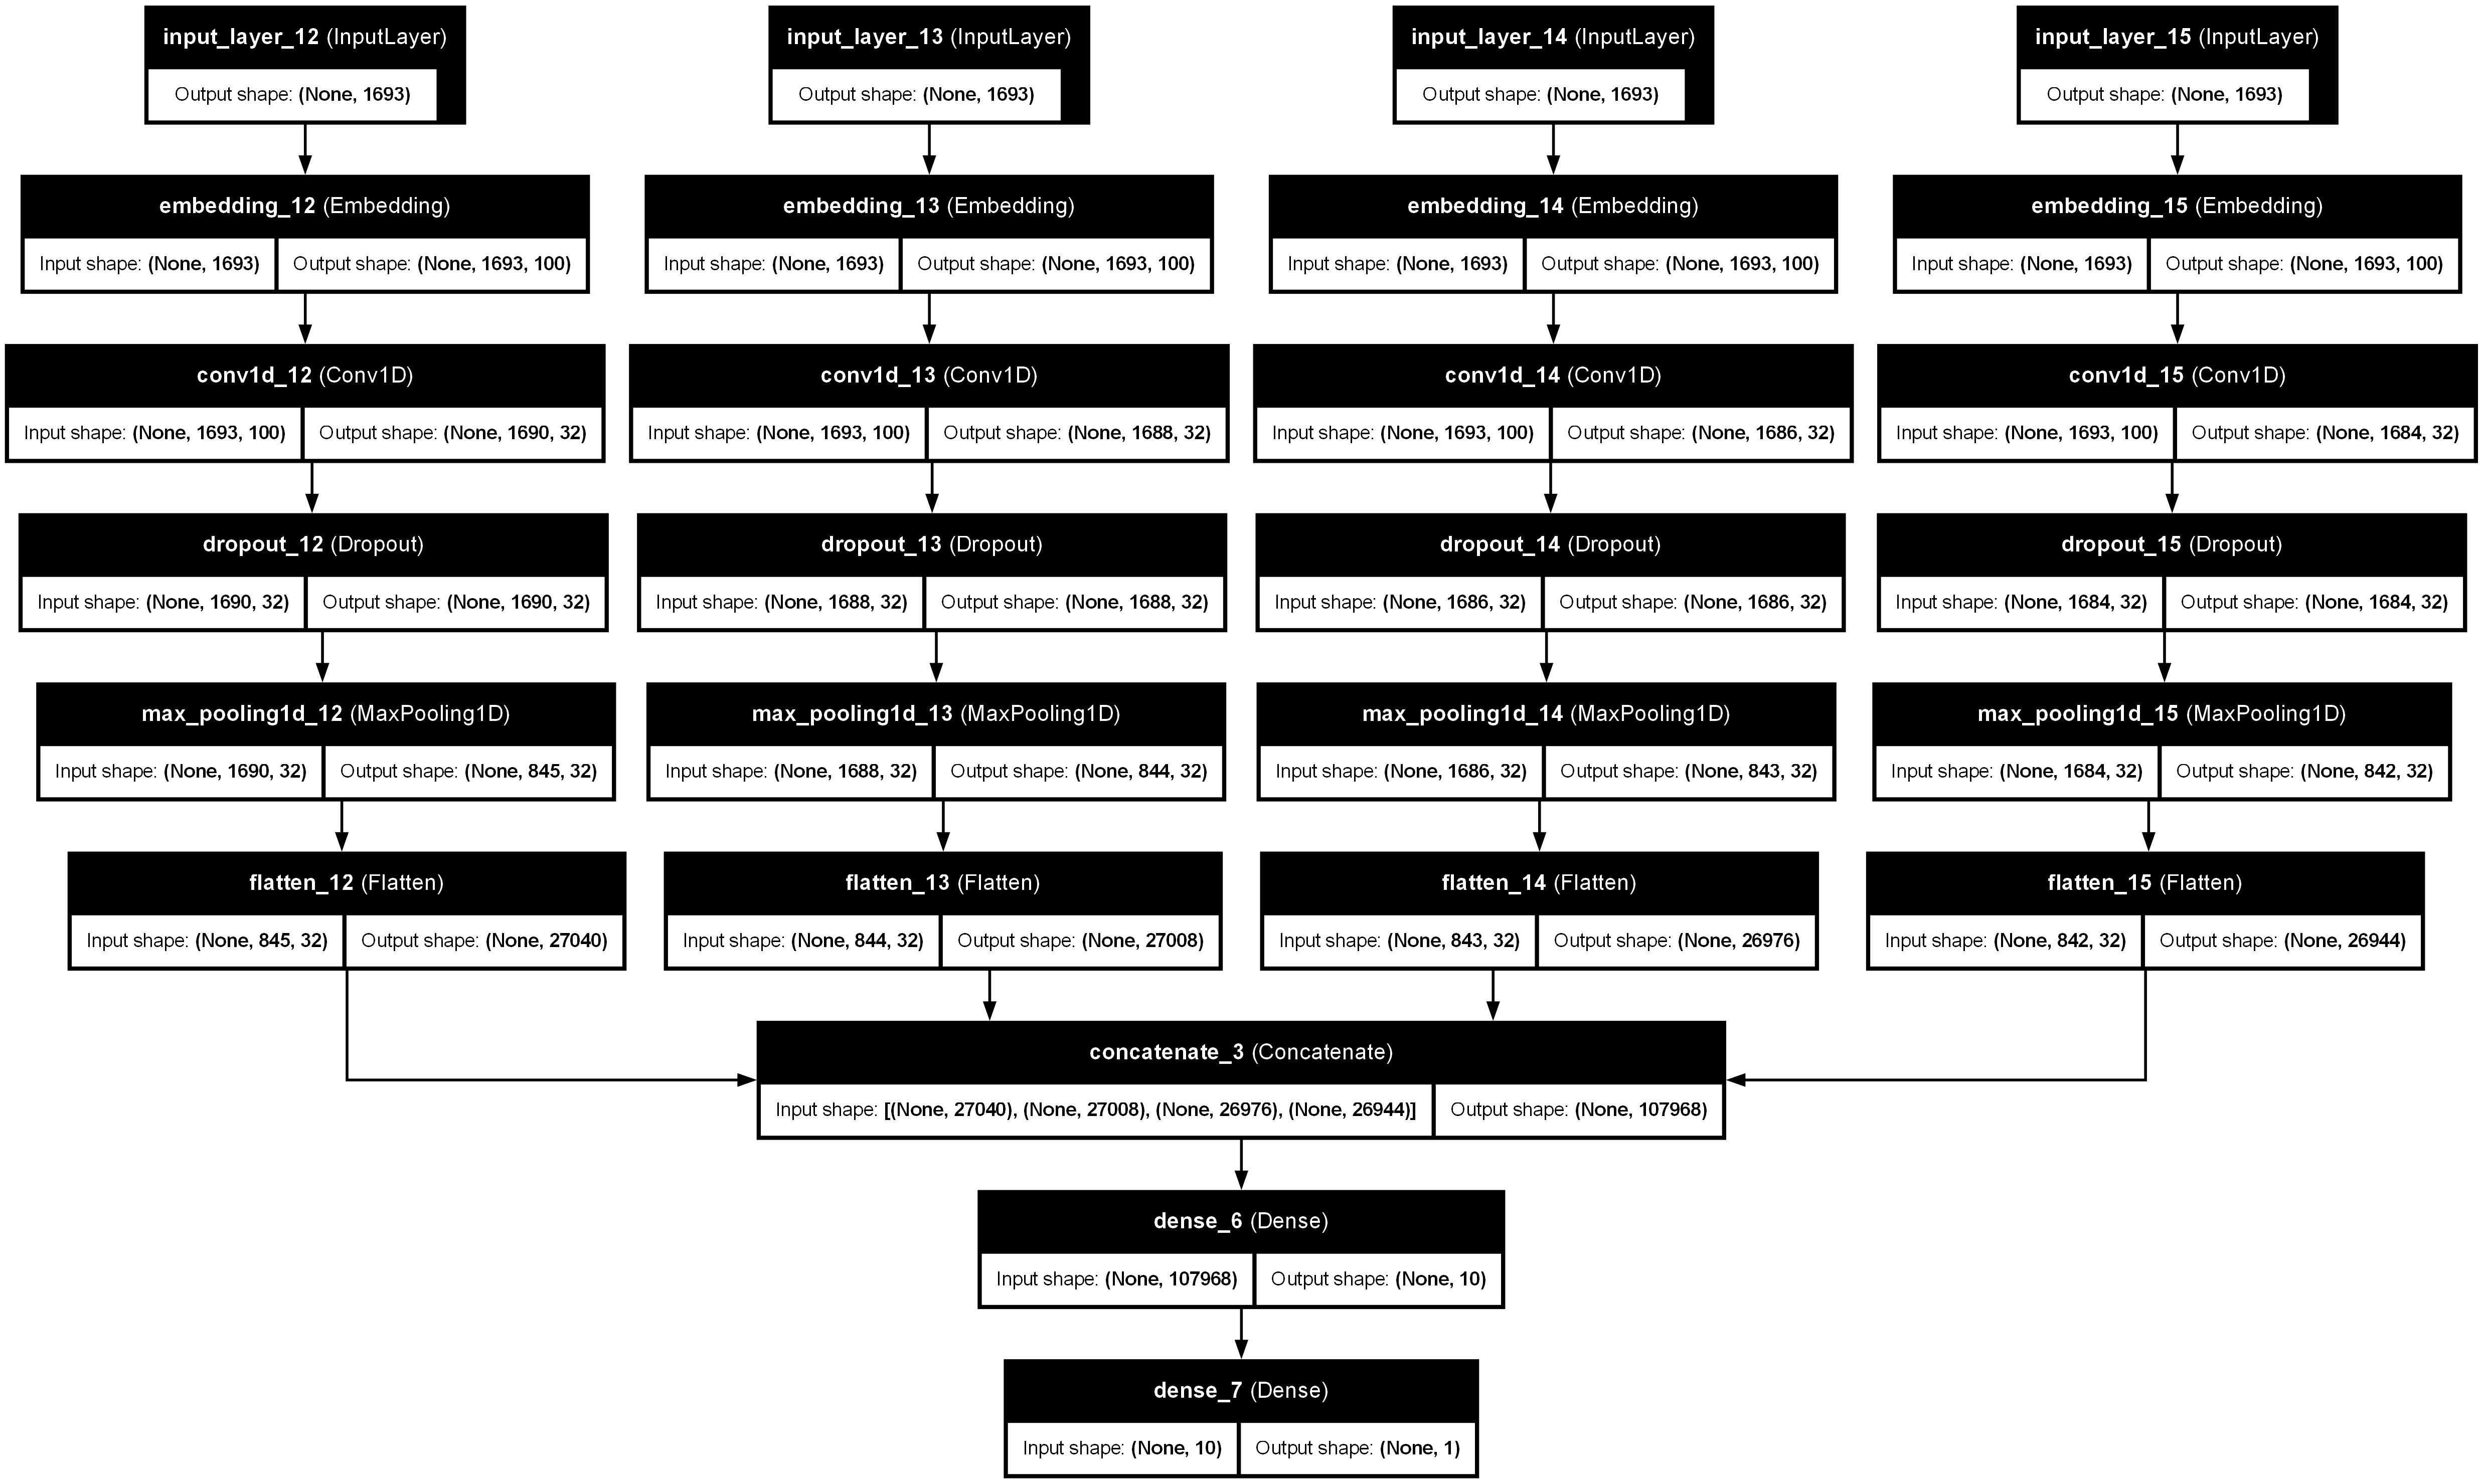

In [144]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [145]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_14      │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_15      │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 1693, 100) │  4,049,200 │ input_layer_12[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 1693, 100) │  4,049,200 │ input_layer_13[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 1693, 100) │  4,049,200 │ input_layer_14[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 1693, 100) │  4,049,200 │ input_layer_15[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 1690, 32)  │     12,832 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 1688, 32)  │     19,232 │ embedding_13[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 1686, 32)  │     25,632 │ embedding_14[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 1684, 32)  │     32,032 │ embedding_15[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 1690, 32)  │          0 │ conv1d_12[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 1688, 32)  │          0 │ conv1d_13[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 1686, 32)  │          0 │ conv1d_14[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 1684, 32)  │          0 │ conv1d_15[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_12    │ (None, 845, 32)   │          0 │ dropout_12[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_13    │ (None, 844, 32)   │          0 │ dropout_13[0][0]  │
│ (MaxPooling1D)      │                   │            │                 

 Total params: 17,366,229 (66.25 MB)

 Trainable params: 17,366,229 (66.25 MB)

 Non-trainable params: 0 (0.00 B)

In [146]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [147]:
import numpy as np
model.fit([paded,paded,paded,paded], np.array(y_train), epochs=10, batch_size=20, validation_data=([paded_test,paded_test,paded_test,paded_test], np.array(y_test)))


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.4994 - loss: 0.7070 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 298ms/step - accuracy: 0.4888 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.4863 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 320ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.4863 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.4812 - loss: 0.6932 - val_accuracy: 0.5

In [159]:
model.save('txt_ai.h5')

In [160]:
import pickle

with open('token.text', 'wb') as f:
    pickle.dump(tokenizer, f)

In [161]:
from tensorflow.keras.models import load_model
model=load_model('txt_ai.h5')

In [162]:
with open ('token.text','rb') as f:
    tokenizer=pickle.load(f)

In [163]:
txt="I hate this man"

In [164]:
txt_test=tokenizer.texts_to_sequences([txt])
txt_test=pad_sequences(txt_test,maxlen=max_len,padding='post')

In [165]:
txt_test.shape

(1, 1693)

In [166]:
model.predict([txt_test,txt_test,txt_test,txt_test])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[0.49981657]], dtype=float32)

In [167]:
model.predict([txt_test,txt_test,txt_test,txt_test])[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


np.float32(0.49981657)

In [168]:
if (model.predict([txt_test,txt_test,txt_test,txt_test])[0][0] > 0.5):
    print('positive')
else:
    print('negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
negative
